Generate grids
Random map
Grid route local
Grid route nonlocal
Approximate Token Swap


<Figure size 432x288 with 0 Axes>

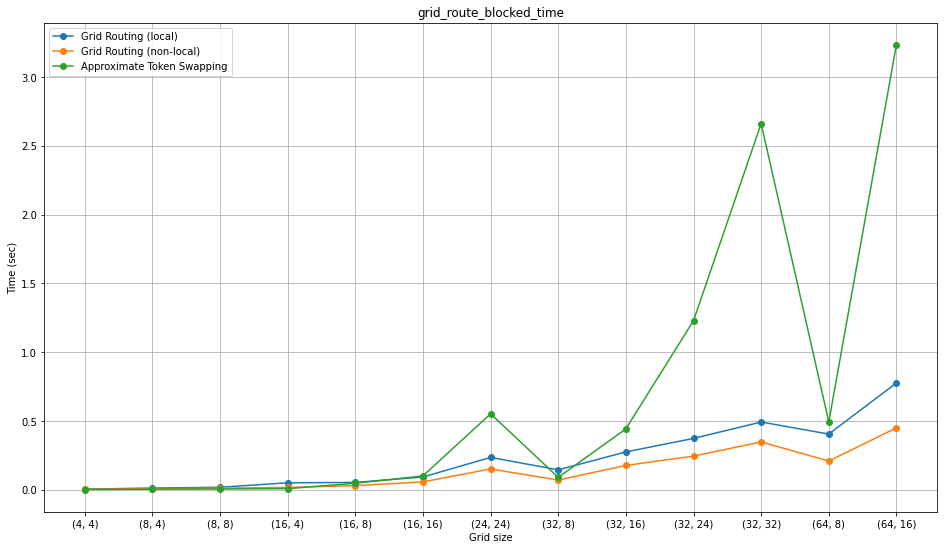

<Figure size 432x288 with 0 Axes>

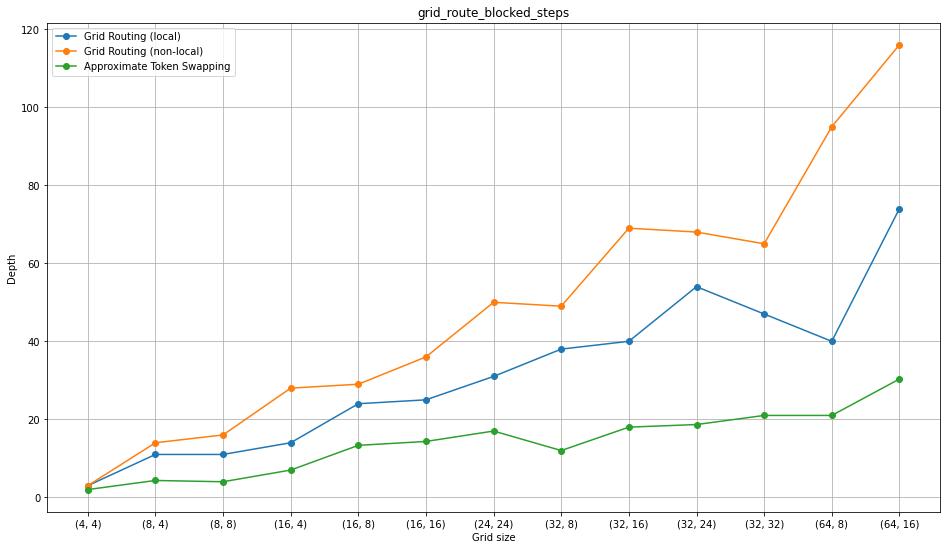

In [3]:
from qtranspiler.architectures import Grid
from qtranspiler.routing.algorithms import approx_token_swapping
from qtranspiler.routing.grid_routing import grid_route
from qtranspiler.utils import blocked_random_map, local_random_permutations, random_map, profile_func

from matplotlib import pyplot as plt

grid_dimensions = [(4, 4), (8, 4), (8, 8), (16, 4), (16, 8), (16, 16),
                   (24, 24), (32, 8), (32, 16), (32, 24), (32, 32), (64, 8),
                   (64, 16)]

block_sizes = [(2, 2), (2, 2), (2, 2), (4, 2), (4, 4), (4, 4), (4, 4), (4, 4),
               (4, 4), (4, 4), (4, 4), (8, 2), (8, 4)]

print("Generate grids")
grids = [Grid(*grid) for grid in grid_dimensions]

print("Random map")
new_labels = [
    local_random_permutations(g, b[0] * b[1], *b) for g, b in zip(grids, block_sizes)
]

num_runs = 3

print("Grid route local")
grid_route_runs_local = [
    profile_func(grid_route, num_runs, g.numpy_array(), new_label, local=True)
    for g, new_label in zip(grids, new_labels)
]

print("Grid route nonlocal")
grid_route_runs_nonlocal = [
    profile_func(grid_route, num_runs, g.numpy_array(), new_label, local=False)
    for g, new_label in zip(grids, new_labels)
]

print("Approximate Token Swap")
approx_token_swapping_runs = [
    profile_func(approx_token_swapping, num_runs, g, new_label)
    for g, new_label in zip(grids, new_labels)
]

grid_timings_local = [run.average_time() for run in grid_route_runs_local]
grid_timings_nonlocal = [
    run.average_time() for run in grid_route_runs_nonlocal
]
approx_token_swap_timings = [
    run.average_time() for run in approx_token_swapping_runs
]

grid_steppings_local = [
    run.average_value(len) for run in grid_route_runs_local
]
grid_steppings_nonlocal = [
    run.average_value(len) for run in grid_route_runs_nonlocal
]
approx_token_swap_steppings = [
    run.average_value(len) for run in approx_token_swapping_runs
]

sizes = [str(g.shape) for g in grids]
plt.figure(1)
plt.figure(figsize=(16, 9))
plt.plot(sizes, grid_timings_local, '-o', label='Grid Routing (local)')
plt.plot(sizes, grid_timings_nonlocal, '-o', label='Grid Routing (non-local)')
plt.plot(sizes,
         approx_token_swap_timings,
         '-o',
         label='Approximate Token Swapping')
plt.legend()
plt.grid(True)
plt.xlabel('Grid size')
plt.ylabel('Time (sec)')
plt.title('grid_route_blocked_time')
# plt.savefig(f"grid_route_blocked_time.png")
plt.show()

plt.figure(2)
plt.figure(figsize=(16, 9))
plt.plot(sizes, grid_steppings_local, '-o', label='Grid Routing (local)')
plt.plot(sizes,
         grid_steppings_nonlocal,
         '-o',
         label='Grid Routing (non-local)')
plt.plot(sizes,
         approx_token_swap_steppings,
         '-o',
         label='Approximate Token Swapping')
plt.legend()
plt.grid(True)
plt.xlabel('Grid size')
plt.ylabel('Depth')
plt.title('grid_route_blocked_steps')
# plt.savefig(f"grid_route_blocked_steps.png")
plt.show()
